The goal for this notebook will be two double-panel plots

1. A double-panel plot with percent error curves on the left, squared error curves on the right

2. A double-panel plot with median percent error histogram on the left, median squared error curves on the right

In [11]:
# First, load the emulator of choice
from cassL import train_emu as te
import numpy as np
import matplotlib.pyplot as plt

In [12]:
experiment = "N_s"

if experiment=="N_k":
    emu_experiments = ["Hnu2_100scales", "Hnu2_200scales", "Hnu2direct", "Hnu2_400scales", "Hnu2_500scales"]
    plot_labels = ["100", "200", "300", "400", "500"]
    file_name = experiment
    colors = ["blue", "orange", "black", "red", "green"]

elif experiment=="N_s":
    emu_experiments = ["Hnu2_3000samples", "Hnu2_4000samples", "Hnu2direct", "Hnu2_6000samples", "Hnu2_7000samples"]
    plot_labels = ["3000", "4000", "5000", "6000", "7000"]
    file_name = experiment
    colors = ["blue", "orange", "black", "red", "green"]

elif experiment=="s^*":
    emu_experiments = ["Hnu2_worst_minsep", "Hnu2_lowmed_minsep", "Hnu2_highmed_minsep", "Hnu2direct"]
    plot_labels = ["0.0545", "0.0629", "0.0713", "0.0797"]
    file_name = "minsep"
    colors = ["blue", "orange", "red", "black"]

In [13]:
deltas = []
percerr = []
delta_meds = []
percerr_meds = []

for emu_name in emu_experiments:
    next_deltas = np.abs(np.load("../../cassL/thesis_deltas/" + emu_name + ".npy"))
    next_percerr = np.abs(np.load("../../cassL/thesis_percents/" + emu_name + ".npy"))
    
    deltas.append(next_deltas)
    percerr.append(next_percerr)
    
    delta_meds.append(np.median(next_deltas, axis=1))
    percerr_meds.append(np.median(next_percerr, axis=1))

In [14]:
deltas[0]

array([[5.97409842e-03, 5.22993299e-03, 5.07347952e-03, ...,
        2.14578432e-05, 1.59550300e-05, 1.10875652e-05],
       [5.09988803e-04, 9.92243521e-05, 4.46456753e-04, ...,
        5.27217221e-06, 4.22059660e-06, 3.12038899e-06],
       [1.19082578e-02, 1.63686246e-02, 1.77711144e-02, ...,
        6.26150105e-07, 5.79832369e-07, 4.05285786e-07],
       ...,
       [1.15606901e-01, 1.16640683e-01, 1.34896909e-01, ...,
        2.08638062e-05, 1.48989451e-05, 1.07782745e-05],
       [2.69665167e-03, 2.24005955e-03, 2.65133724e-03, ...,
        2.04620375e-06, 1.53372226e-06, 6.26281599e-07],
       [9.34909957e-03, 9.48975011e-03, 9.24795823e-03, ...,
        1.91777602e-05, 1.52657795e-05, 1.22450470e-05]])

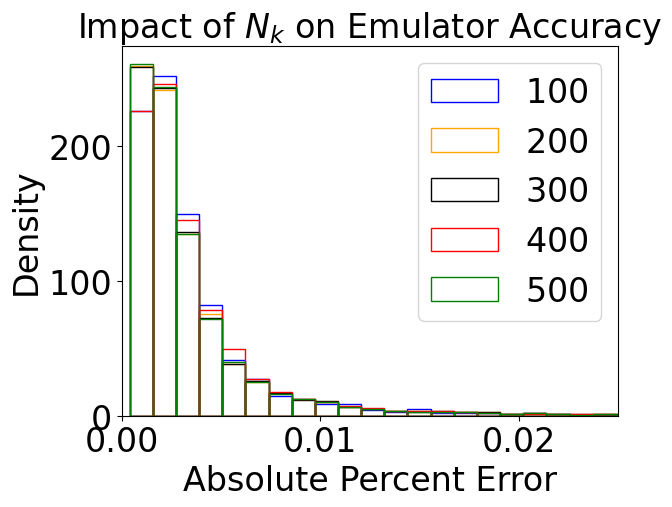

In [15]:
fig = plt.figure()
ax = fig.gca()

first_bins = None

transparency=(.00, .00, .00, 0)

#ax.hist(percerr_meds[0], alpha=0.2, bins=200)
for i in range(len(emu_experiments)):
    if i == 0:
        counts, first_bins, patches = ax.hist(percerr_meds[i], bins=100, edgecolor=colors[i], facecolor=transparency,
            density=True, label="$" + plot_labels[i] + "$")
    else:
        ax.hist(percerr_meds[i], bins=first_bins, edgecolor=colors[i], facecolor=transparency,
            density=True, label="$" + plot_labels[i] + "$")

ax.set_xlim((0, 0.025))
#ax.set_xlim((0, 0.005))

ax.tick_params(labelsize=24)

if experiment=="N_k":
    ax.legend(fontsize=24)

ax.set_title("Impact of $" + experiment + "$ on Emulator Accuracy", fontsize=24)
ax.set_xlabel("Absolute Percent Error", fontsize=24)
ax.set_ylabel("Density", fontsize=24)
plt.savefig("../../thesis_paper/res/error_on_emulators/percents-hist-" + file_name + ".png", bbox_inches="tight")

In [16]:
if experiment != "N_k":
    fig = plt.figure()
    ax = fig.gca()

    first_bins = None

    #ax.hist(percerr_meds[0], alpha=0.2, bins=200)

    for i in range(len(emu_experiments)):
        if i == 0:
            counts, first_bins, patches = ax.hist(delta_meds[i], bins=100, edgecolor=colors[i],
                facecolor=transparency, density=True, label="$" + plot_labels[i] + "$")
        else:
            ax.hist(delta_meds[i], bins=first_bins, edgecolor=colors[i], color="white",
                facecolor=transparency, density=True, label="$" + plot_labels[i] + "$")

    ax.set_xlim((0, 0.5))
    ax.tick_params(labelsize=24)

    ax.legend(fontsize=24)

    ax.set_title("Impact of $" + experiment + "$ on Emulator Accuracy", fontsize=24)
    ax.set_xlabel("Absolute Delta", fontsize=24)
    ax.set_ylabel("Density", fontsize=24)
    plt.savefig("../../thesis_paper/res/error_on_emulators/deltas-hist-" + file_name + ".png", bbox_inches="tight")